In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from g_over_t import add_elapsed_time_column
import math
import itertools

FILTERED_COMBINED_DATA_PATH = R"april21govert\combined_filtered_SBand_March.csv"
# FILTERED_COMBINED_DATA_PATH = R"april21govert\combined_filtered_XBand_April.csv"
data=pd.read_csv(FILTERED_COMBINED_DATA_PATH)
data=add_elapsed_time_column(data)
data

,timestamp_posix,timestamp,power,azimuth,elevation,elapsed
0,1.711418e+09,2024-03-26T02:00:55.162320+00:00,-40.65,116.376838,38.014969,0.000000
1,1.711418e+09,2024-03-26T02:00:55.302502+00:00,-40.65,116.376697,37.795585,0.140182
2,1.711418e+09,2024-03-26T02:00:55.444027+00:00,-40.65,116.376556,37.574098,0.281707
3,1.711418e+09,2024-03-26T02:00:55.596320+00:00,-40.65,116.376404,37.335759,0.434000
4,1.711418e+09,2024-03-26T02:00:55.742233+00:00,-40.65,116.376258,37.107405,0.579913
...,...,...,...,...,...,...
27713,1.711422e+09,2024-03-26T03:07:57.377557+00:00,-40.64,225.004000,90.000000,4022.215237
27714,1.711422e+09,2024-03-26T03:07:57.524484+00:00,-40.63,225.004000,90.000000,4022.362164
27715,1.711422e+09,2024-03-26T03:07:57.670675+00:00,-40.69,225.004000,90.000000,4022.508355
27716,1.711422e+09,2024-03-26T03:07:57.814321+00:00,-40.68,225.004000,90.000000,4022.652001


In [2]:
def isvert(
       data:pd.DataFrame,
       index1:int,
       index2:int,
       angle_threshold_degrees=1.0
) -> bool:
    """determines if two points are vertical. Points that do not move are considered in this case to be vertical

    Args:
        data (pd.DataFrame): _description_
        index1 (int): _description_
        index2 (int): _description_
        angle_threshold_degrees (float, optional): _description_. Defaults to 1.0.

    Returns:
        bool: _description_
    """
    row1=data.iloc[index1]
    row2=data.iloc[index2]

    elevation1=row1[f"elevation"]
    elevation2=row2[f"elevation"]
    azimuth1=row1[f"azimuth"]
    azimuth2=row2[f"azimuth"]

    # print(f"{azimuth1=}")
    # print(f"{azimuth2=}")
    # print(f"{elevation1=}")
    # print(f"{elevation2=}")

    rise = elevation2 - elevation1
    run = azimuth2 - azimuth1
    if abs(rise)<(1e-9) and abs(run)<(1e-9):
        return True
    # print(f"{rise=}")
    # print(f"{run=}")

    angle_degrees=abs(math.degrees(math.atan2(rise,run)))

    # print(f"{angle_degrees=}")
    if (90-angle_threshold_degrees)<=angle_degrees<=(90+angle_threshold_degrees):
        return True
    else:
        return False
    
    
x=isvert(data,2,3)
print(x)


True


In [3]:
def in_box(
        data:pd.DataFrame,
        box_start_index: int,
        box_stop_index: int,
)->bool:
        if  not isvert(data,box_start_index,box_stop_index):
                return False
        start_row= data.iloc[box_start_index]
        start_row_elevation=start_row["elevation"]
        start_row_azimuth=start_row["azimuth"]
        stop_row=data.iloc[box_stop_index]
        stop_row_elevation=stop_row["elevation"]
        stop_row_azimuth=stop_row["azimuth"]

        min_elevation=min(start_row_elevation,stop_row_elevation)
        max_elevation=max(start_row_elevation,stop_row_elevation)

        box_height=max_elevation-min_elevation
        box_width=box_height*.01

        average_azimuth=((start_row_azimuth+stop_row_azimuth)/2)

        max_azimuth=average_azimuth+(box_width/2)
        min_azimuth=average_azimuth-(box_width/2)

        for point_index in range(box_start_index,box_stop_index+1):
                point_row = data.iloc[point_index]
                point_row_elevation=point_row["elevation"]
                point_row_azimuth=point_row["azimuth"]
                if (
                        point_row_azimuth > max_azimuth
                        or point_row_azimuth < min_azimuth
                        or point_row_elevation > max_elevation
                        or point_row_elevation < min_elevation
                ):
                        return False
                
        return True

        


print (in_box(data,0,100))
    

True


In [4]:
def find_vertical_segments(
        data:pd.DataFrame
):
    points_on_vertical = []
    segments = []
    current_segment = []
    for index in range(len(data)-1):
        if isvert(data,index,index+1):
            # print(f"{index=}")
            points_on_vertical.append(index)
            points_on_vertical.append(index+1)
    points_on_vertical = sorted(set(points_on_vertical))

    for point in points_on_vertical:
        if len(current_segment)==0 or max(current_segment)+1 == point :

            #this means the point is part of the current segment
            current_segment.append(point)
            pass
        else:
            #this means the point is not part of the current segment
            segments.append(current_segment)
            current_segment = [point]
            pass
            
    if len(current_segment) != 0:
        segments.append(current_segment)
    print(f"{segments =}")  
    print(f"{len(segments) =}")  
    print(f"{segments[-1]=}")
    print(f"{segments[0]=}") 
    print(f"{len(segments[0]) =}")  
    print(f"{segments[5]=}") 
    print(f"{segments[200]=}") 
    for segment in segments:
        print(f"{segment[0]} to {segment[-1]}  length: {len(segment)}")
              



    return points_on_vertical
indexes=find_vertical_segments(data)
print(indexes)



segments =[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95], [103, 104, 105, 106, 107, 108, 109], [117, 118, 119, 120, 121, 122], [172, 173, 174, 175, 176, 177, 178], [186, 187, 188, 189, 190, 191], [206, 207, 208, 209, 210, 211, 212], [220, 221, 222, 223, 224, 225, 226], [241, 242, 243, 244, 245, 246, 247], [254, 255, 256, 257, 258, 259, 260], [296, 297, 298, 299, 300, 301, 302], [310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329], [358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 39

In [5]:
indexes=find_vertical_segments(data)
print(indexes)


segments =[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95], [103, 104, 105, 106, 107, 108, 109], [117, 118, 119, 120, 121, 122], [172, 173, 174, 175, 176, 177, 178], [186, 187, 188, 189, 190, 191], [206, 207, 208, 209, 210, 211, 212], [220, 221, 222, 223, 224, 225, 226], [241, 242, 243, 244, 245, 246, 247], [254, 255, 256, 257, 258, 259, 260], [296, 297, 298, 299, 300, 301, 302], [310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329], [358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 39

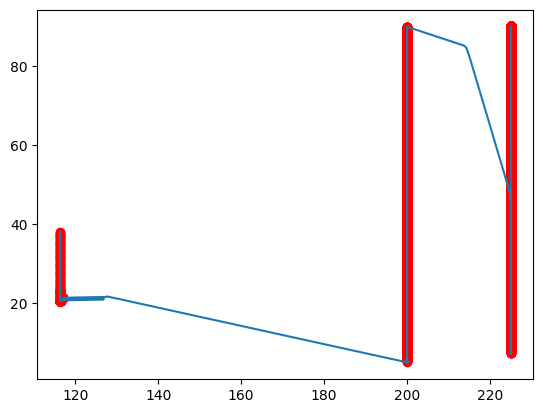

In [6]:
plt.plot(data["azimuth"],data["elevation"])
segment_data=data.iloc[indexes]
plt.scatter(segment_data["azimuth"],segment_data["elevation"],color="red")

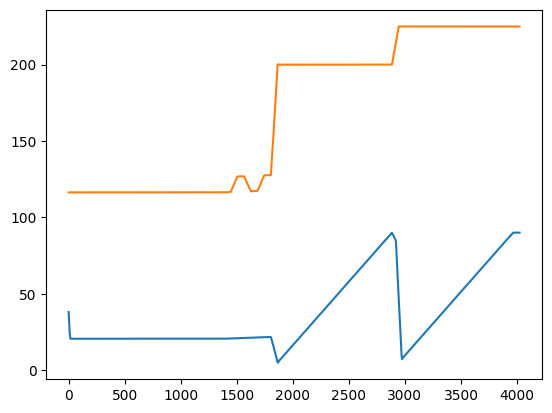

In [7]:
plt.plot(data["elapsed"],data["elevation"])
plt.plot(data["elapsed"],data["azimuth"])

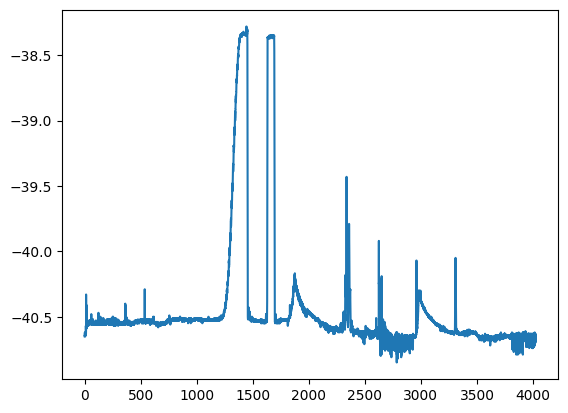

In [8]:
plt.plot(data["elapsed"],data["power"])
